## Working on Time Series with Pandas


* Forecasting: Principles and Practice (3rd ed) [link](https://otexts.com/fpp3/)
* Pandas documentation for time series(https://pandas.pydata.org/docs/user_guide/timeseries.html)

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates
plt.style.use('dark_background')
%matplotlib inline

In [2]:
## Generate three timestamps starting from "2023-01-01" with frequency of "1 hr"

ts_index = pd.date_range(start = "2023-01-01", periods = 3, freq = "1H")
ts_index

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='H')

Some of the commonly used `freq` tags

| Date Offset | Frequency String | Description        |
|-------------|------------------|--------------------|
| MonthEnd    | 'M'              | calendar month end |
| Day         | 'D'              | one absolute day   |
| Hour        | 'H'              | one hour           |
| Minute      | 'T' or 'min'     | one minute         |
| Second      | 'S'              | one second         |

*Check this for other supported "freq" tags:
https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects*



**Manipulating and converting date times with timezone information**

In [3]:
## Generate timestamps specific to timezones

# Time zone UTC
print(ts_index.tz_localize("UTC"))

# Time zone Asia/kokata
print(ts_index.tz_localize("Asia/kolkata"))

DatetimeIndex(['2023-01-01 00:00:00+00:00', '2023-01-01 01:00:00+00:00',
               '2023-01-01 02:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='H')
DatetimeIndex(['2023-01-01 00:00:00+05:30', '2023-01-01 01:00:00+05:30',
               '2023-01-01 02:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', freq=None)


____
**Task - 1**
____

Your manager has given you a climate timeseries dataset with 1000 rows and asked you to analyse it but the dataset **does not have a timestamp column**. You are informed that each row of this dataset represents outputs from different sensors.

Your manager added that the observations were made starting from "*12th jan 2020*" and is **daily data**, meaning one obeservation recorded per day starting from `2020-01-12`.

* Create a datetime index in pandas starting from `12th jan 2020` with `1000` observatiions.

* Add timestamps as index to the dataset.



In [4]:
# Read climate data set
climate_data = pd.read_csv('https://tinyurl.com/mpbudws')
print(climate_data.head(5))

   maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  uvIndex.1
0        27        12           0.0     11.6        5          1
1        27        12           0.0     11.6        5          1
2        27        12           0.0     11.6        5          1
3        27        12           0.0     11.6        5          1
4        27        12           0.0     11.6        5          1


In [5]:
# Generate timestamp values
start_date = '2020-01-12'
data_length = 1000
timestamp = pd.date_range(start = start_date, periods = data_length, freq = 'D')

# Add timestamp column to the climate_data
climate_data['timestamps'] = pd.to_datetime(timestamp, format = '%Y-%d-%m %H.%M')
climate_data = climate_data.set_index('timestamps')
print(climate_data.head(10))

            maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  uvIndex.1
timestamps                                                               
2020-01-12        27        12           0.0     11.6        5          1
2020-01-13        27        12           0.0     11.6        5          1
2020-01-14        27        12           0.0     11.6        5          1
2020-01-15        27        12           0.0     11.6        5          1
2020-01-16        27        12           0.0     11.6        5          1
2020-01-17        27        12           0.0     11.6        5          1
2020-01-18        27        12           0.0     11.6        5          5
2020-01-19        27        12           0.0     11.6        5          6
2020-01-20        27        12           0.0     11.6        5          6
2020-01-21        27        12           0.0     11.6        5          7


____

**Resampling a time series**

In [6]:
## Genrate hourly data with random values for 10 periods
idx = pd.date_range(start = '2023-01-01', periods = 10, freq = 'D')
data = {'value': np.random.rand(10)}
df = pd.DataFrame(data, index = idx)
df = df.resample('H').interpolate(method='linear')
df.head()

,value
2023-01-01 00:00:00,0.595054
2023-01-01 01:00:00,0.604213
2023-01-01 02:00:00,0.613373
2023-01-01 03:00:00,0.622532
2023-01-01 04:00:00,0.631692


To perform resampling, the daraframe index has to be in pandas DateTime format and we need to specify the aggregation fuction like `mean()`, `min()`, `max()`, etc. Refer to official documentation of pandas resample for more information. [pandas.DataFrame.resample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html)

In [7]:
## Resample (in this case, downsample) the data to z frequency of "2 hours"
df.resample('2H').mean()

,value
2023-01-01 00:00:00,0.599633
2023-01-01 02:00:00,0.617952
2023-01-01 04:00:00,0.636271
2023-01-01 06:00:00,0.654590
2023-01-01 08:00:00,0.672909
...,...
2023-01-09 16:00:00,0.179889
2023-01-09 18:00:00,0.159216
2023-01-09 20:00:00,0.138544
2023-01-09 22:00:00,0.117871


____
**Task - 2**
____

From your initial analysis of the climate data, you came to know that there is only a slight variation in the data on a daily basis. It is redundant to have too many values with no extra information and might cause computational overhead. So, you decide to convert the daily data to weekly data. In other words, you want to resample the climate time series from `1 day` to  `1 week`. The resampled values must be the maximum observation over the respective weeks.


In [8]:
## Resample the climate time series from 1 day to 1 week
## with values as maximum over the week
climate_data_resampled = climate_data.resample('W').max()
climate_data_resampled.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1
timestamps,,,,,,
2020-01-12,27,12,0.0,11.6,5,1
2020-01-19,27,12,0.0,11.6,5,6
2020-01-26,27,12,0.0,11.6,5,7
2020-02-02,27,12,0.0,11.6,5,6
2020-02-09,27,16,0.0,11.6,5,1


**Performing date and time arithmetic with absolute or relative time increments**

In [9]:
from datetime import datetime, timedelta
date1 = datetime.now()

# add 2 days, 5 hours and 10 minutes to 1st date
date2 = date1 + timedelta(days = 2, hours = 5, minutes = 10)

date2

datetime.datetime(2024, 4, 12, 8, 35, 25, 949633)

____

**Task - 3**
____

Assume that the data you have was collected in India. You want to store this data in an internal database, and your database engineer tells you that their team can only work with `timestamps without time zone` (24  hour clock UTC). Achieve this by subtracting 5 hours and 30 minutes from all the values in the timestamp index.




In [10]:
climate_data.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1
timestamps,,,,,,
2020-01-12,27,12,0.0,11.6,5,1
2020-01-13,27,12,0.0,11.6,5,1
2020-01-14,27,12,0.0,11.6,5,1
2020-01-15,27,12,0.0,11.6,5,1
2020-01-16,27,12,0.0,11.6,5,1


In [11]:
climate_data.index = climate_data.index - timedelta(hours = 5, minutes = 30)
climate_data.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1
timestamps,,,,,,
2020-01-11 18:30:00,27,12,0.0,11.6,5,1
2020-01-12 18:30:00,27,12,0.0,11.6,5,1
2020-01-13 18:30:00,27,12,0.0,11.6,5,1
2020-01-14 18:30:00,27,12,0.0,11.6,5,1
2020-01-15 18:30:00,27,12,0.0,11.6,5,1


____

### **Time Series Data Wrangling and Visualization**



Vizualising a subset of data using groupby and pivot. The data set consists of timestamps column `Date` (frequency is 1 day), `store` (store id), `product` (product id)  and `number_sold` (number of a product sold by a store).

In [12]:
## Data source: https://www.kaggle.com/datasets/samuelcortinhas/time-series-practice-dataset
sales_data = pd.read_csv('https://tinyurl.com/mr2rv4yh')
sales_data.head()

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808


____

**Task - 3**
____


Convert 'date' column type to pandas.datetime and set date as index of the dataframe

In [13]:
# Convert 'date' column type to pandas.datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Set Date as index of the dataframe
sales_data = sales_data.set_index('Date')

sales_data.head()

,store,product,number_sold
Date,,,
2010-01-01,0,0,801
2010-01-02,0,0,810
2010-01-03,0,0,818
2010-01-04,0,0,796
2010-01-05,0,0,808


In [14]:
## Resample and forward fill null values
grouping_cols = ['store', 'product']

def resample_fn(data):
    data = data.groupby(grouping_cols).apply(lambda x: x.resample('W').mean().ffill())
    return data

## Resample the data belonging to each product of each store seperately
## and group the data by 'store' and 'product' by applying the fuction above
sales_data_processed = resample_fn(sales_data)
sales_data_processed.head()

store  product  number_sold
store product Date                                   
0     0       2010-01-03    0.0      0.0   809.666667
              2010-01-10    0.0      0.0   815.285714
              2010-01-17    0.0      0.0   826.857143
              2010-01-24    0.0      0.0   826.571429
              2010-01-31    0.0      0.0   830.285714

In [15]:
## Remove MultiIndex, only Date is required as Index
sales_data_processed = sales_data_processed.reset_index(level = [0, 1], drop = True)
sales_data_processed.head()

,store,product,number_sold
Date,,,
2010-01-03,0.0,0.0,809.666667
2010-01-10,0.0,0.0,815.285714
2010-01-17,0.0,0.0,826.857143
2010-01-24,0.0,0.0,826.571429
2010-01-31,0.0,0.0,830.285714


**Plot the sales of all the products from store id 0**

In [16]:
## Filter the data for store id equal to 0
store_id_0 = sales_data_processed[sales_data_processed['store'] == 0]
store_id_0

,store,product,number_sold
Date,,,
2010-01-03,0.0,0.0,809.666667
2010-01-10,0.0,0.0,815.285714
2010-01-17,0.0,0.0,826.857143
2010-01-24,0.0,0.0,826.571429
2010-01-31,0.0,0.0,830.285714
...,...,...,...
2018-12-09,0.0,9.0,868.000000
2018-12-16,0.0,9.0,860.142857
2018-12-23,0.0,9.0,864.000000


In [17]:
## Modify the data such that index represents date and
## columns represent the product id

store_0_pivot = store_id_0.pivot_table(index = 'Date', columns = 'product', values = 'number_sold')
store_0_pivot.head()

product,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Date,,,,,,,,,,
2010-01-03,809.666667,847.000000,875.333333,799.000000,935.333333,870.000000,879.333333,868.666667,753.000000,782.666667
2010-01-10,815.285714,850.571429,889.285714,804.142857,939.857143,880.142857,884.714286,869.000000,756.857143,786.000000
2010-01-17,826.857143,857.428571,876.285714,799.142857,943.142857,874.428571,881.571429,870.142857,753.571429,784.142857
2010-01-24,826.571429,860.571429,874.857143,796.285714,941.285714,878.428571,871.428571,860.857143,752.142857,781.714286
2010-01-31,830.285714,849.714286,867.142857,785.285714,934.571429,875.000000,874.714286,865.142857,751.714286,779.285714


<Axes: xlabel='Date'>

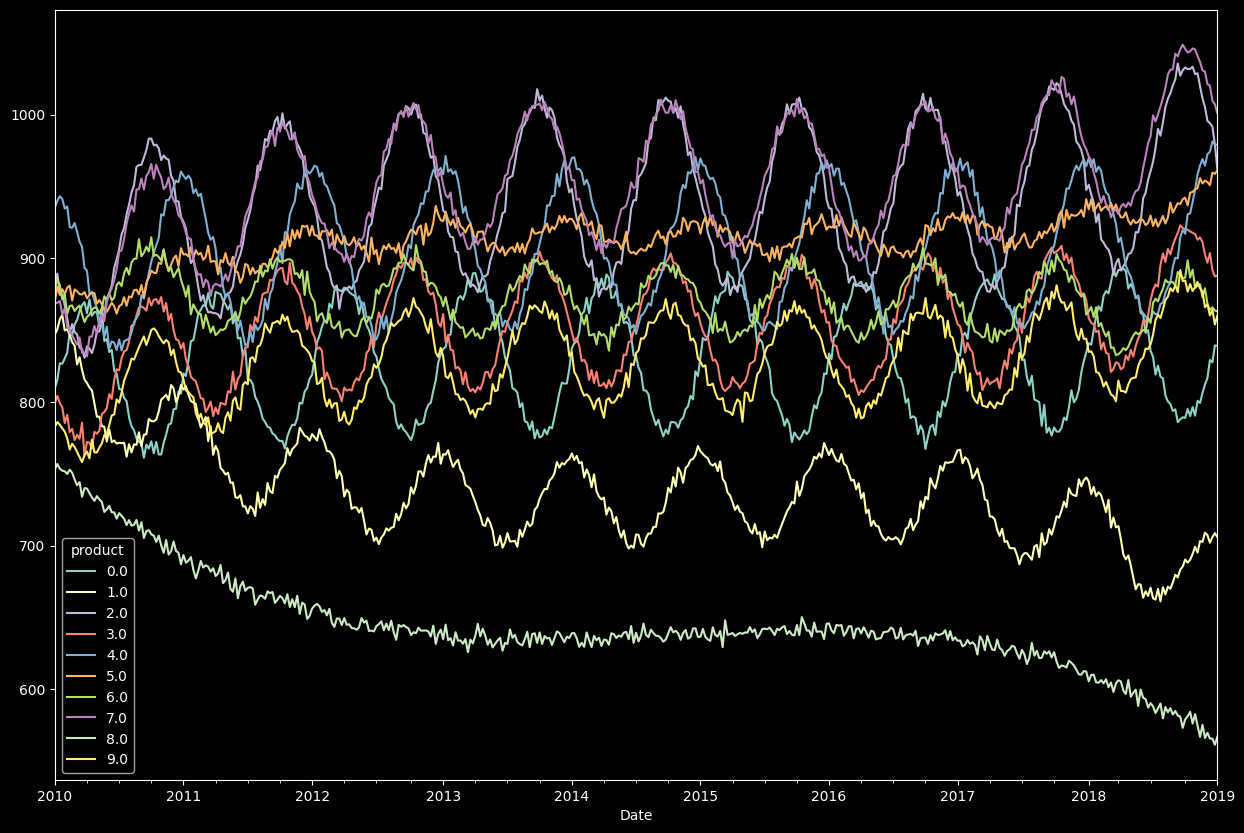

In [18]:
store_0_pivot.plot(figsize=(15,10))

Analyze how the sales of `product 1` of `store 0` have changed over the years

In [19]:
# Filter  product id equal to 1 from store_0
product_1_s0 = store_id_0[(store_id_0['product'] == 1)]

In [20]:
# Create a column called year
product_1_s0['year'] = product_1_s0.index.year

# create a column called month
product_1_s0['month'] = product_1_s0.index.month

# create a DataFrame whose index represents months and columns respresent years
result_df = product_1_s0.pivot_table(index = 'month', columns = 'year', values = 'number_sold')

result_df

<ipython-input-20-c314452e0c63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_1_s0['year'] = product_1_s0.index.year
<ipython-input-20-c314452e0c63>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_1_s0['month'] = product_1_s0.index.month


year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
month,,,,,,,,,,
1,853.057143,804.971429,776.571429,763.285714,760.857143,763.035714,762.114286,762.342857,738.928571,706.0
2,844.500000,788.928571,766.714286,756.285714,751.892857,755.392857,756.714286,751.321429,731.250000,NaN
3,823.714286,777.071429,751.714286,741.542857,738.857143,744.114286,743.428571,737.892857,719.178571,NaN
4,807.535714,760.357143,732.428571,722.642857,726.321429,726.607143,729.285714,715.257143,699.057143,NaN
5,783.542857,744.285714,723.250000,714.785714,712.857143,714.800000,713.228571,703.964286,676.642857,NaN
6,774.250000,730.714286,708.464286,701.628571,701.742857,707.821429,704.714286,694.178571,667.428571,NaN
7,769.071429,726.628571,706.371429,704.464286,703.964286,706.035714,704.057143,692.914286,665.485714,NaN
8,770.971429,732.642857,714.500000,706.892857,709.600000,711.600000,713.428571,700.107143,669.607143,NaN
9,778.035714,742.571429,724.857143,719.428571,724.500000,727.535714,722.035714,705.464286,680.142857,NaN


<Axes: xlabel='month'>

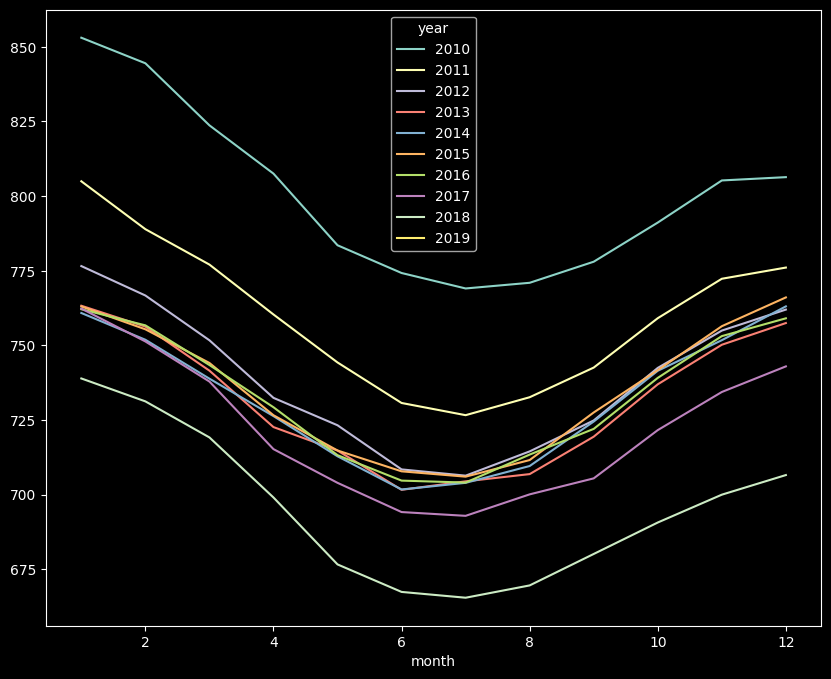

In [21]:
result_df.plot(figsize=(10,8))